In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('laptop_data_cleaned.csv')

## Data Analysis

In [4]:
# Check the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


All columns have 1273 non-null entries, indicating no missing values in the dataset.
Numerical columns include 'Ram', 'Weight', 'Price', etc., while categorical columns include 'Company', 'TypeName', 'Os', etc.

In [5]:
# Display summary statistics for numerical columns
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


From the output above we can conclude that:
- Most laptops have 8GB of RAM, but some have 64GB
- The average weight is around 2.04 kg, with the lightest being 0.69 kg and the heaviest 4.7 kg
- Prices range from about 9.13 to 12.69
- Only 14.7% of laptops on average have a touchscreen
- About 27.9% of laptops have IPS displays

In [6]:
# Check for null values
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64


All columns have 0 null values, meaning there are no missing entries in this dataset.

In [7]:
# Get an overview of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())

Unique values in Company:
Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
Unique values in TypeName:
TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: count, dtype: int64
Unique values in Cpu_brand:
Cpu_brand
Intel Core i7            515
Intel Core i5            423
Other Intel Processor    141
Intel Core i3            134
AMD Processor             60
Name: count, dtype: int64
Unique values in Gpu_brand:
Gpu_brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64
Unique values in Os:
Os
Windows    1100
Others      152
Mac          21
Name: count,

**Company**:
- Dell, Lenovo, and HP are the most common brands, accounting for the majority of laptops
- Less common brands include Huawei, LG, and Google

**TypeName**:
- "Notebook" is the most common type (706 laptops), followed by "Gaming" and "Ultrabook."
- Specialized types like "Workstation" and "Netbook" have fewer entries.

**Cpu_brand**:
- Most laptops feature Intel Core processors (i7: 515, i5: 423), with AMD processors being less common.

**Gpu_brand**:
- Intel GPUs are dominant (703 laptops), with Nvidia and AMD accounting for the remaining.

**Os**:
- Windows is the most common operating system (1100 laptops).

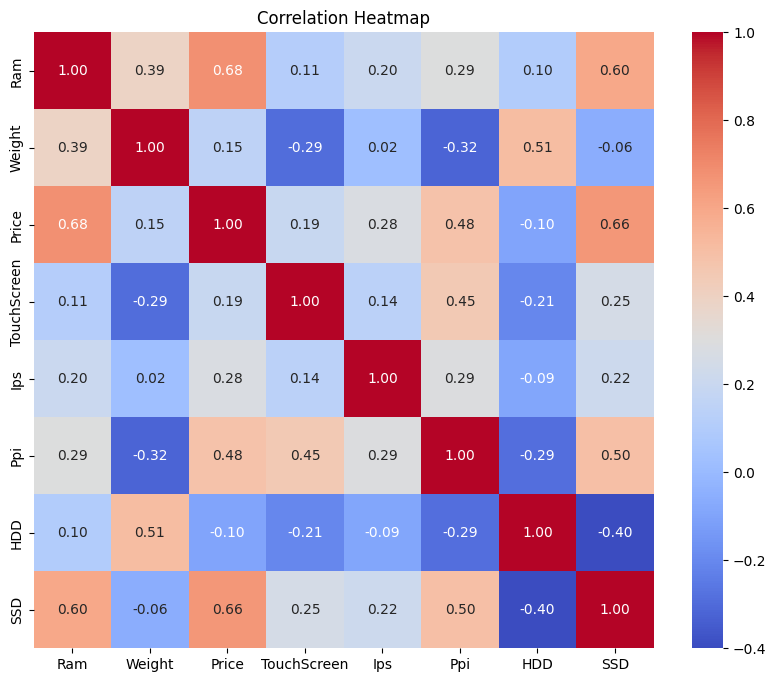

In [10]:
# Generate a correlation matrix for numerical features
correlation_matrix = df[['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Strong Positive Correlation (closer to 1)**:
- Ram and Price (0.68): Higher RAM is associated with higher prices
- SSD and Price (0.66): Laptops with larger SSDs tend to be more expensive

**Negative correlation (closer to -1)**:
- Weight and Ppi (-0.32): Heavier laptops tend to have lower screen pixel density
- HDD and SSD (-0.40): As SSD sizes increase, HDD sizes tend to decrease, indicating these are substitutes

**Near-zero correlation**:
- TouchScreen and Ram (0.11): Touchscreen features do not depend much on RAM size
- Weight and TouchScreen (-0.29): There is a weak relationship between laptop weight and touchscreen availability

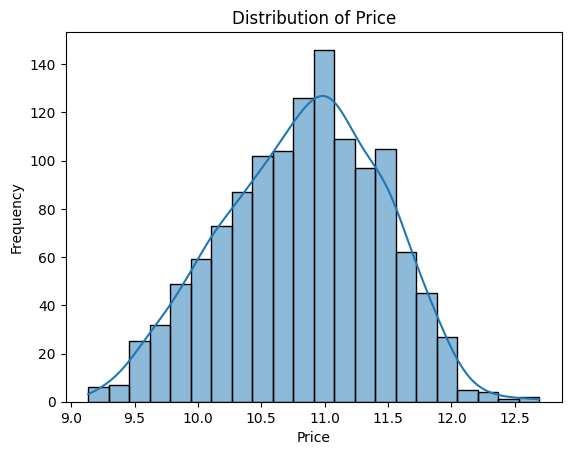

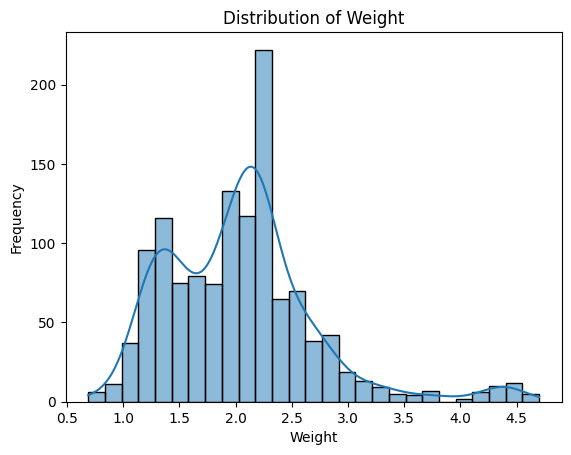

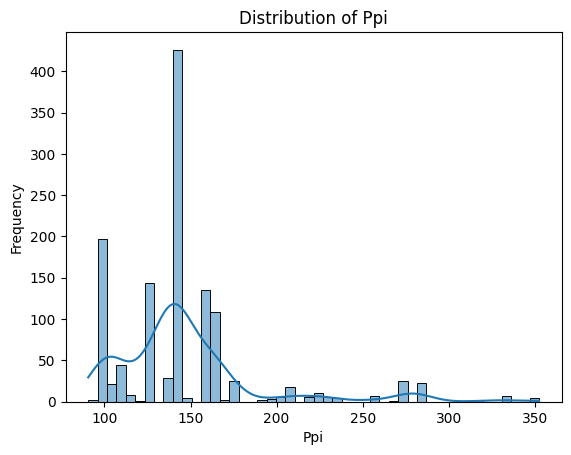

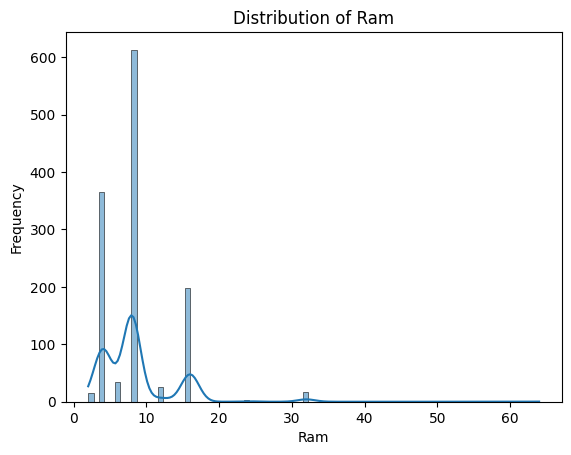

In [11]:
columns_to_plot = ['Price', 'Weight', 'Ppi', 'Ram']
for col in columns_to_plot:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Distribution of Price**:
- The majority of prices are centered around 11 (probably in thousands)
- The distribution appears roughly normal, indicating that most laptops fall within a common price range

**Distribution of Weight**:
- Most laptops weigh around 2.0 kg, with a smaller number being lighter (<1.5 kg) or heavier (>3.0 kg)
- The distribution is slightly right-skewed, meaning there are some very heavy laptops in the dataset

**Distribution of PPI**:
- Two main peaks can be seen, around 100-150 and 150-200 PPI
- High-density screens (>200 PPI) are less common, indicating most laptops have standard resolutions

**Distribution of RAM**:
- The most common RAM sizes are 4GB, 8GB, and 16GB, as seen by the tall peaks
- Some laptops have higher RAM capacities (>32GB), but these are rare
- The distribution is right-skewed, with most laptops having moderate RAM sizes

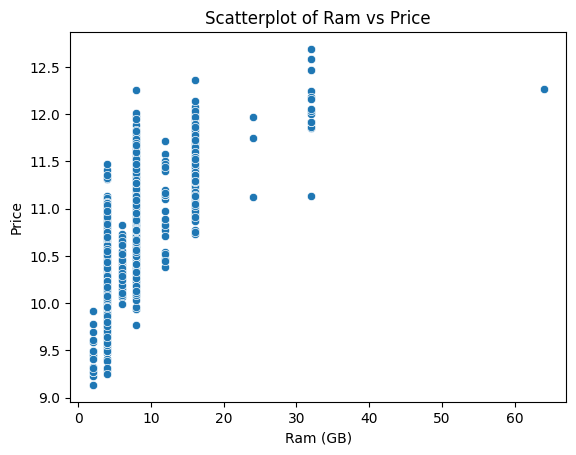

In [12]:
sns.scatterplot(x='Ram', y='Price', data=df)
plt.title("Scatterplot of Ram vs Price")
plt.xlabel("Ram (GB)")
plt.ylabel("Price")
plt.show()

- There is a positive trend: as RAM increases, the price also tends to increase
- Laptops with 4GB, 8GB and 16GB RAM are the most common, as seen by the concentration of points
- A few laptops with extremely high RAM (64GB) are outliers and are priced significantly higher
- The spread at each RAM level indicates that other factors also influence the price

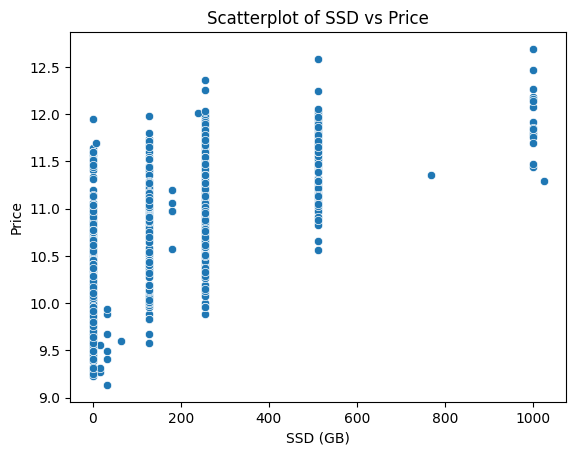

In [17]:
sns.scatterplot(x='SSD', y='Price', data=df)
plt.title("Scatterplot of SSD vs Price")
plt.xlabel("SSD (GB)")
plt.ylabel("Price")
plt.show()

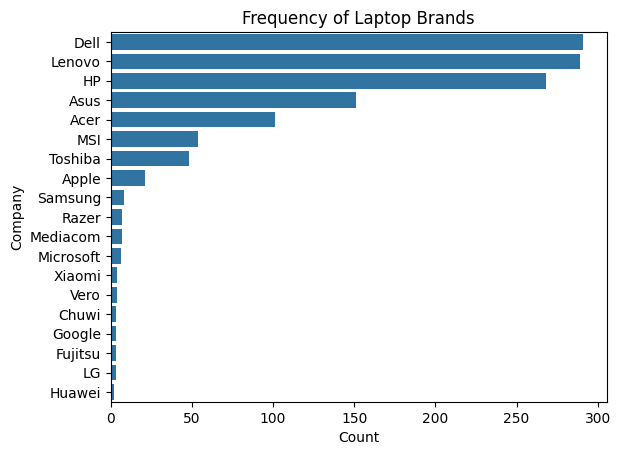

In [14]:
# Frequency of laptop brands
sns.countplot(y='Company', data=df, order=df['Company'].value_counts().index)
plt.title("Frequency of Laptop Brands")
plt.xlabel("Count")
plt.ylabel("Company")
plt.show()

- Dell, Lenovo, and HP are the most common brands, each having close to 300 entries
- Asus and Acer also have a significant presence, making them popular mid-tier brands
- Premium brands like Apple and niche brands like MSI and Razer have fewer entries
- Less common brands, such as Huawei, LG, and Google, make up a very small portion of the dataset

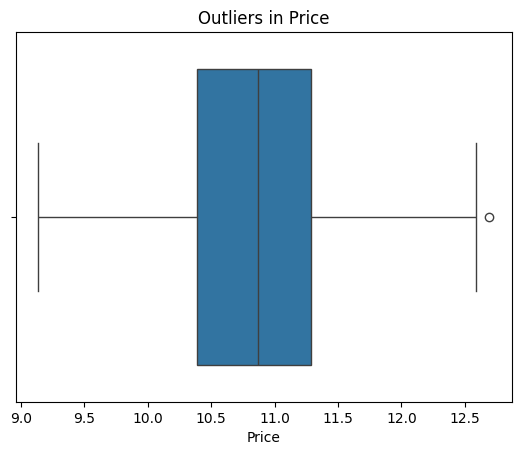

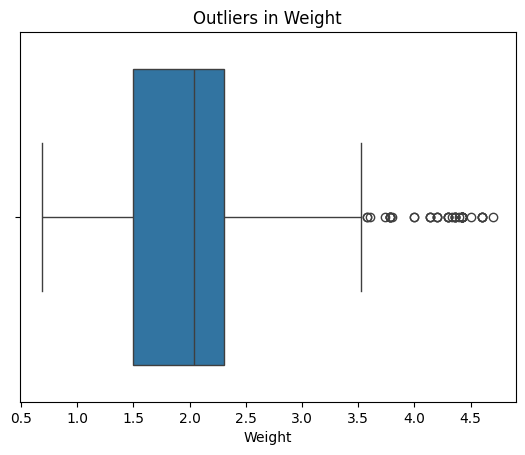

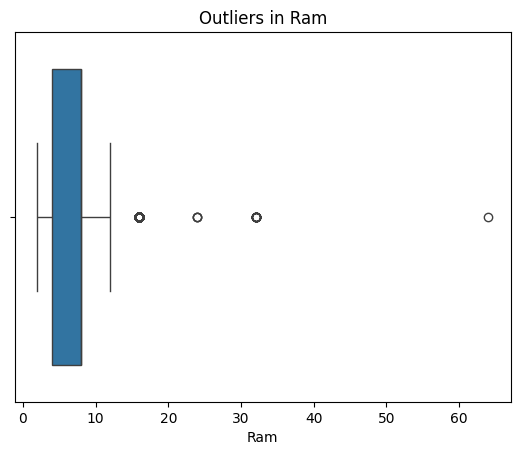

In [15]:
# Boxplots to detect outliers in key numerical features
columns_to_check = ['Price', 'Weight', 'Ram']
for col in columns_to_check:
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)
    plt.show()

**Outliers in Price**:
- Most prices are within the range of 10.0 to 12.5 (probably thousands)
- A single outlier is present above 12.5, indicating a significantly higher-priced laptop

**Outliers in Weight**:
- Most laptops weigh between 1.5 kg and 2.5 kg
- Multiple outliers are present beyond 3.0 kg, representing heavier laptops

**Outliers in RAM**:
- Most laptops have RAM sizes between 4GB and 16GB
- Several outliers exist above 16GB, including extreme values like 64GB

## Data Exploration

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns for PCA
numerical_columns = ['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']

# Standardize the data (necessary for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

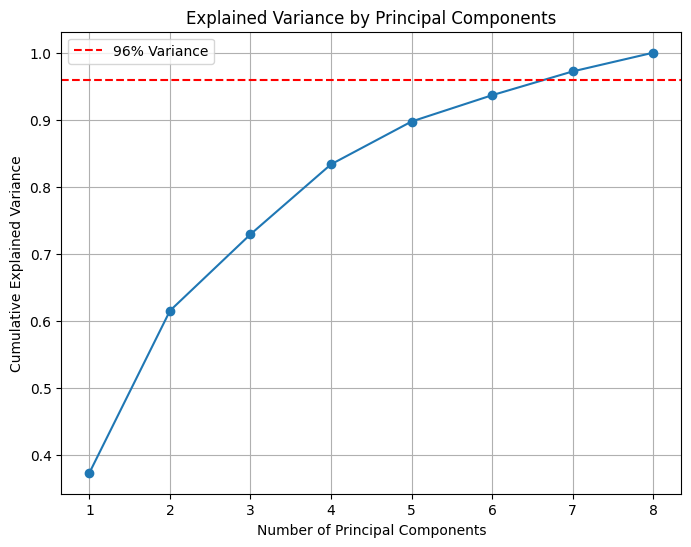

In [14]:
# Calculate explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.axhline(y=0.96, color='r', linestyle='--', label="96% Variance")
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()

In [15]:
# Find the number of components required for 96% variance
n_components = np.argmax(explained_variance_ratio >= 0.96) + 1
print(f"Number of components required to explain 96% of variance: {n_components}")

Number of components required to explain 96% of variance: 7


7 principal components explain 96% of the data's variability, reducing the original 8 features without losing much information.

In [19]:
# Define features and target variable for regression
X = df[['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']]
y = df['Price']

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

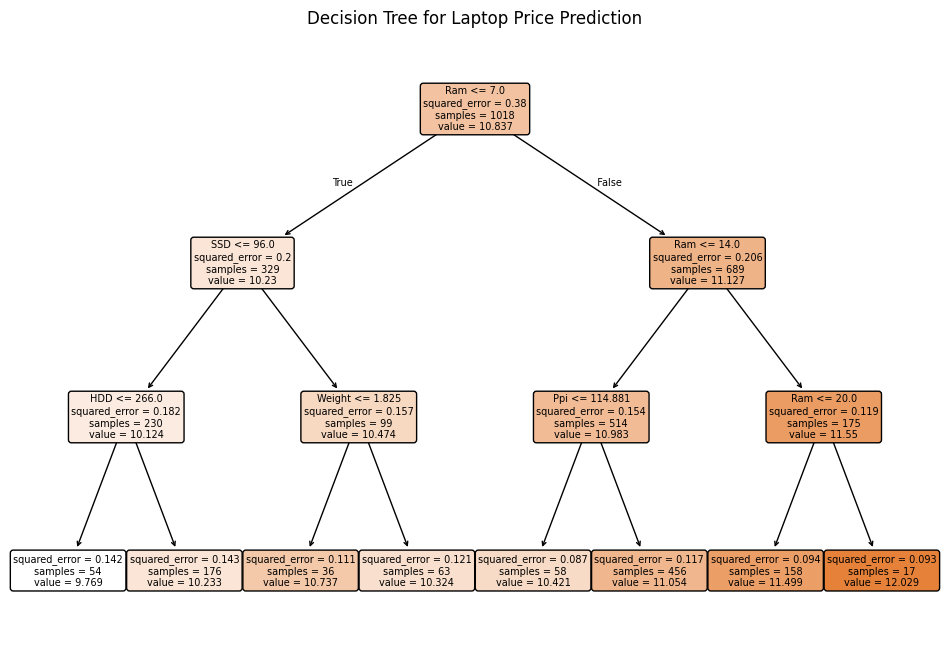

In [21]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Fit a Decision Tree Regressor with limited depth
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for Laptop Price Prediction")
plt.show()

RAM is the top factor:
- Laptops with ≤7GB RAM have an average price of 10.23.
- Laptops with >14GB RAM have an average price of 11.55 or higher.

SSD size affects lower RAM laptops:
- Laptops with SSD ≤96GB average at 10.12.

PPI impacts higher RAM laptops:
- Laptops with PPI ≤114.88 average at 10.42, while those above average at 11.05.

Weight and HDD contribute smaller refinements.

## Experimental Method

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Hypothesis**: 

Random Forest will perform well because it can handle non-linear relationships and does not require feature scaling. It is expected to achieve a low MSE due to its ability to combine multiple decision trees and reduce overfitting through averaging.

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Initialize Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate Test MSE
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Test MSE: {rf_mse}")

# Perform Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_mse = -rf_cv_scores.mean()
print(f"Random Forest Cross-Validation MSE: {rf_cv_mse}")

Random Forest Test MSE: 0.08165140493464076
Random Forest Cross-Validation MSE: 0.08018567511888361


**Hypothesis**: 

Gradient Boosting will outperform Random Forest because it corrects errors iteratively and captures complex patterns. However, it may take longer to train, and its performance depends on good hyperparameter tuning.

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training set
gb_model.fit(X_train_scaled, y_train)  # Scaled data is important for boosting models

# Predict on the test set
gb_predictions = gb_model.predict(X_test_scaled)

# Calculate Test MSE
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting Test MSE: {gb_mse}")

# Perform Cross-Validation
gb_cv_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
gb_cv_mse = -gb_cv_scores.mean()
print(f"Gradient Boosting Cross-Validation MSE: {gb_cv_mse}")

Gradient Boosting Test MSE: 0.07579768293990367
Gradient Boosting Cross-Validation MSE: 0.0807200265892413


**Hypothesis**: 

AdaBoost will perform well on this dataset by sequentially focusing on misclassified data points. It may achieve better performance than Random Forest and Gradient Boosting, especially if the weak learners (e.g., decision stumps) capture meaningful splits.

In [25]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Initialize AdaBoost with Decision Trees as weak learners
adaboost_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training set
adaboost_model.fit(X_train, y_train)

# Predict on the test set
adaboost_predictions = adaboost_model.predict(X_test)

# Calculate Test MSE
adaboost_mse = mean_squared_error(y_test, adaboost_predictions)
print(f"AdaBoost Test MSE: {adaboost_mse}")

# Perform Cross-Validation
adaboost_cv_scores = cross_val_score(adaboost_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
adaboost_cv_mse = -adaboost_cv_scores.mean()
print(f"AdaBoost Cross-Validation MSE: {adaboost_cv_mse}")

AdaBoost Test MSE: 0.0987013087308913
AdaBoost Cross-Validation MSE: 0.11053235651991475


**Hypothesis**: 

MLP can capture complex non-linear relationships better than tree-based methods. However, it may underperform due to potential convergence issues and sensitivity to feature scaling.

In [24]:
from sklearn.neural_network import MLPRegressor

# Initialize MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model on the training set
mlp_model.fit(X_train_scaled, y_train)

# Predict on the test set
mlp_predictions = mlp_model.predict(X_test_scaled)

# Calculate Test MSE
mlp_mse = mean_squared_error(y_test, mlp_predictions)
print(f"MLP Test MSE: {mlp_mse}")

# Perform Cross-Validation
mlp_cv_scores = cross_val_score(mlp_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mlp_cv_mse = -mlp_cv_scores.mean()
print(f"MLP Cross-Validation MSE: {mlp_cv_mse}")

MLP Test MSE: 0.11589740597397742
MLP Cross-Validation MSE: 0.11803119269216573


### Insights
1. Gradient Boosting achieved the best performance, confirming its ability to capture complex patterns.
2. Random Forest performed consistently well, indicating its robustness.
3. MLP struggled to converge, leading to a higher error compared to ensemble methods.

### Hyperparameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

# Best parameters and performance
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best Random Forest CV MSE:", -grid_rf.best_score_)

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest CV MSE: 0.07817285678498735


In [26]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train_scaled, y_train)

# Best parameters and performance
print("Best Gradient Boosting Parameters:", grid_gb.best_params_)
print("Best Gradient Boosting CV MSE:", -grid_gb.best_score_)

Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Gradient Boosting CV MSE: 0.0751561402155531


In [27]:
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 100)],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500, 1000],
    'activation': ['relu', 'tanh']
}

grid_mlp = GridSearchCV(MLPRegressor(random_state=42), param_grid_mlp, cv=5, scoring='neg_mean_squared_error')
grid_mlp.fit(X_train_scaled, y_train)

# Best parameters and performance
print("Best MLP Parameters:", grid_mlp.best_params_)
print("Best MLP CV MSE:", -grid_mlp.best_score_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Best MLP Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01, 'max_iter': 500}
Best MLP CV MSE: 0.10128143604309855


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define parameter grid for AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator': [DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=3)]
}

# Perform GridSearch
grid_adaboost = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid_adaboost, cv=5, scoring='neg_mean_squared_error')
grid_adaboost.fit(X_train, y_train)

# Best parameters and performance
print("Best AdaBoost Parameters:", grid_adaboost.best_params_)
print("Best AdaBoost CV MSE:", -grid_adaboost.best_score_)

Best AdaBoost Parameters: {'estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 0.1, 'n_estimators': 200}
Best AdaBoost CV MSE: 0.1094304369371036
